### 7-1CSVデータの読込

In [105]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('../datafiles/Survived.csv')
df.head(2) # 先頭2行の確認

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [109]:

# 各列の値の数を集計する
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


### 7-2正解データの集計（不均衡データの確認）

In [110]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 7-3欠損値の確認

In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 7-4データの行数・列数を確認

In [112]:
df.shape

(891, 11)

### 7-5欠損値の穴埋め

In [113]:
# Age列を平均値で穴埋め
df["Age"] = df["Age"].fillna(df["Age"].mean())
# Embarked列を最頻値で穴埋め
df["Embarked"] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [114]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### 7-6特徴量と正解データの分割

In [115]:
# 特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare']

x = df[col]
t = df['Survived']

In [117]:
x.shape, t.shape

((891, 5), (891,))

In [120]:
x_train,x_test,y_train,y_test = train_test_split(
    x,t,test_size = 0.2,random_state = 0)
# x_trainのサイズの確認
x_train.shape

(712, 5)

In [121]:
x_train.head(5)

,Pclass,Age,SibSp,Parch,Fare
140,3,29.699118,0,2,15.2458
439,2,31.000000,0,0,10.5000
817,2,31.000000,1,1,37.0042
378,3,20.000000,0,0,4.0125
491,3,21.000000,0,0,7.2500


### 7-8モデルの作成と学習

In [122]:
model = tree.DecisionTreeClassifier(max_depth = 5,
 random_state = 0,class_weight ='balanced')

model.fit(x_train,y_train) # 学習

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

### 7-9決定木モデルの正解率を計算

In [123]:
model.score(X = x_test,y = y_test)

0.7374301675977654

### 7-10繰り返し学習の為のlearn関数の作成

In [124]:
def learn(x,t,depth=3):
    x_train,x_test,y_train,y_test = train_test_split(x,
        t,test_size = 0.2,random_state = 0)
    model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0,class_weight="balanced")
    model.fit(x_train,y_train)

    score=model.score(X=x_train,y=y_train)
    score2=model.score(X=x_test,y=y_test)
    return round(score,3),round(score2,3),model

### 7-11木の深さに伴う学習率の変化を確認

In [125]:
for j in range(1,15): # jは木の深さ jには1～14が入る
    # xは特徴量、tは正解データ
    train_score,test_score,model = learn(x,t,depth = j)
    sentence="訓練データの正解率{}"
    sentence2="訓練データの正解率{}"
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,
    train_score,test_score))

深さ1:訓練データの正解率0.659訓練データの正解率0.704
深さ2:訓練データの正解率0.699訓練データの正解率0.732
深さ3:訓練データの正解率0.704訓練データの正解率0.737
深さ4:訓練データの正解率0.698訓練データの正解率0.726
深さ5:訓練データの正解率0.722訓練データの正解率0.737
深さ6:訓練データの正解率0.77訓練データの正解率0.698
深さ7:訓練データの正解率0.771訓練データの正解率0.648
深さ8:訓練データの正解率0.781訓練データの正解率0.631
深さ9:訓練データの正解率0.83訓練データの正解率0.704
深さ10:訓練データの正解率0.851訓練データの正解率0.687
深さ11:訓練データの正解率0.878訓練データの正解率0.676
深さ12:訓練データの正解率0.892訓練データの正解率0.654
深さ13:訓練データの正解率0.909訓練データの正解率0.654
深さ14:訓練データの正解率0.92訓練データの正解率0.654


### 7-12Age列の平均値と中央値を確認する

In [160]:
df2 = pd.read_csv('../datafiles/Survived.csv')
print(df2['Age'].mean()) # 平均値の計算
print(df2['Age'].median()) # 中央値の計算

29.69911764705882
28.0


In [161]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 7-13小グループの作成を行う為の基準を探す

In [162]:
# type(df2["Survived"])
df2.isnull().sum()
df2.groupby('Survived').mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [163]:
df2.groupby('Survived').mean(numeric_only=True)['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### 7-14Pclassで集計

In [164]:
df2.groupby('Pclass').mean(numeric_only=True)['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### 7-15ピボットテーブルを使う

In [165]:
pd.pivot_table(df2,index = 'Survived',columns = 'Pclass',
values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


### 7-16平均値以外の統計量を求める

In [166]:
pd.pivot_table(df2,index = 'Survived',columns = 'Pclass',
values = 'Age',aggfunc = max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


### 7-17locでAge列の欠損値を平均値で穴埋めする

In [167]:
# Age列の欠損値行を抜き出すのに必要（欠損だとTrue)
is_null = df2['Age'].isnull()

# Pclass 1　に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 35

# Pclass 2　に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 25

# Pclass 3　に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 20

### 7-18learn関数を使ってモデルに再学習

In [168]:
#特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare']
x = df2[col]
t = df2['Survived']

for j in range(1,15): # jは木の深さ
    s1,s2,m = learn(x,t,depth = j)
    sentence='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(sentence.format(j,s1,s2))

深さ1:訓練データの精度0.659::テストデータの精度0.704
深さ2:訓練データの精度0.699::テストデータの精度0.67
深さ3:訓練データの精度0.722::テストデータの精度0.715
深さ4:訓練データの精度0.74::テストデータの精度0.704
深さ5:訓練データの精度0.76::テストデータの精度0.726
深さ6:訓練データの精度0.794::テストデータの精度0.793
深さ7:訓練データの精度0.819::テストデータの精度0.749
深さ8:訓練データの精度0.84::テストデータの精度0.749
深さ9:訓練データの精度0.885::テストデータの精度0.743
深さ10:訓練データの精度0.906::テストデータの精度0.732
深さ11:訓練データの精度0.93::テストデータの精度0.726
深さ12:訓練データの精度0.947::テストデータの精度0.737
深さ13:訓練データの精度0.961::テストデータの精度0.732
深さ14:訓練データの精度0.969::テストデータの精度0.721


### 7-19groupbyで平均値を求める

In [169]:
#性別ごとの各列の平均値を集計。戻り値はデータフレーム
sex = df2.groupby('Sex').mean(numeric_only=True)
sex['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### 7-20棒グラフを作成

<Axes: xlabel='Sex'>

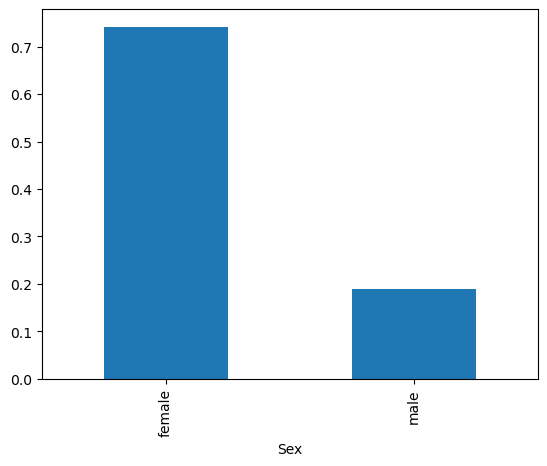

In [170]:
sex['Survived'].plot(kind='bar')

### 7-21モデルの再学習（失敗）

In [171]:
# 特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare','Sex']

x = df2[col]
t = df2['Survived']

train_score,test_score,model = learn(x,t) # 学習

ValueError: could not convert string to float: 'female'

### 7-22文字列を数値に変換する

In [172]:
male = pd.get_dummies(df2['Sex'],drop_first = True)
male

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


### 7-23drop_firstを指定しないと…

In [173]:
pd.get_dummies(df2['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


### 7-24Embarked列をダミー変数化（２値で表す）

In [174]:
pd.get_dummies(df2['Embarked'],drop_first = True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


### 7-25drop_firstをFalseにすると…

In [175]:
embarked = pd.get_dummies(df2['Embarked'],drop_first = False)
embarked.head(3)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True


### 7-26concatで２つのデータフレームを列方向に連結

In [176]:
x_tmp=pd.concat([x,male],axis=1)

x_tmp.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,True
1,1,38.0,1,0,71.2833,female,False


### 7-27行連結の例

In [177]:
tmp = pd.concat([x,x],axis = 0)
tmp.shape

(1782, 6)

### 7-28モデルの再学習

In [178]:
learn_depth=20
x_new = x_tmp.drop("Sex",axis=1)
for j in range(1,20): # jは木の深さ
 # xは特徴量、tは目的変数
    s1,s2,m = learn(x_new,t,depth = j)
    s='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(s.format(j,s1,s2))

深さ1:訓練データの精度0.787::テストデータの精度0.788
深さ2:訓練データの精度0.792::テストデータの精度0.782
深さ3:訓練データの精度0.847::テストデータの精度0.81
深さ4:訓練データの精度0.854::テストデータの精度0.849
深さ5:訓練データの精度0.865::テストデータの精度0.86
深さ6:訓練データの精度0.876::テストデータの精度0.866
深さ7:訓練データの精度0.904::テストデータの精度0.866
深さ8:訓練データの精度0.912::テストデータの精度0.894
深さ9:訓練データの精度0.926::テストデータの精度0.899
深さ10:訓練データの精度0.948::テストデータの精度0.883
深さ11:訓練データの精度0.956::テストデータの精度0.832
深さ12:訓練データの精度0.972::テストデータの精度0.849
深さ13:訓練データの精度0.971::テストデータの精度0.855
深さ14:訓練データの精度0.979::テストデータの精度0.844
深さ15:訓練データの精度0.983::テストデータの精度0.844
深さ16:訓練データの精度0.983::テストデータの精度0.844
深さ17:訓練データの精度0.985::テストデータの精度0.844
深さ18:訓練データの精度0.986::テストデータの精度0.849
深さ19:訓練データの精度0.986::テストデータの精度0.849


### 7-29モデルの保存

In [179]:
s1,s2,model = learn(x_new,t,depth = 5)

# モデルの保存
import pickle
with open('survived.pkl','wb') as f:
    pickle.dump(model,f)

OSError: [Errno 22] Invalid argument: 'survived.pkl'

### 7-30特徴量重要度を確認

In [180]:
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

### 7-31特徴量重要度をデータフレームに変換

In [181]:
#データフレームに変換
pd.DataFrame(model.feature_importances_,index = x_new.columns)

,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316


### 演習

In [187]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('../datafiles/ex4.csv')
df.head(3) # 先頭2行の確認

# df[(df["sex"]==1)].count()["sex"]/df.count()["sex"]
df["sex"].mean()

# for cl,de,se,sc in df["class"].value_counts():
#     print(cl)
df.groupby("class").mean()["score"]

# for c in sorted(df["class"].value_counts().keys()):
#     print(c,df[(df["class"]==c)].mean()["score"])
pd.pivot_table(df,index="class",columns="sex",values="score")

dummy=pd.get_dummies(df["dept_id"],drop_first=True)
df2=pd.concat([df,dummy], axis=1)
df2=df2.drop("dept_id",axis="1")


ValueError: No axis named 1 for object type DataFrame

# 練習問題

In [44]:
df = pd.read_csv('ex4.csv')
df.head(3)

,class,dept_id,sex,score
0,3,0,1,60.170169
1,3,5,1,86.610078
2,2,6,1,69.761279


In [45]:
df["sex"].mean()

0.5133333333333333

In [46]:
df.groupby('class').mean()['score']

class
0    68.850195
1    69.510764
2    71.611092
3    67.572909
4    68.814253
Name: score, dtype: float64

In [48]:
pd.pivot_table(df,index='class',columns='sex',values='score')

sex,0,1
class,,
0,68.358569,69.274011
1,67.472218,71.379432
2,71.704884,71.532109
3,63.897676,72.013815
4,69.952314,67.676191


In [121]:
dummy = pd.get_dummies(df['dept_id'],drop_first = True)

df2 = pd.concat([df,dummy],axis = 1)

df2 = df2.drop('dept_id',axis = 1)

### Chap07課題

[Text(0.5, 0.8333333333333334, 'male <= 0.5\ngini = 0.5\nsamples = 712\nvalue = [356.0, 356.0]'),
 Text(0.25, 0.5, 'Pclass <= 2.5\ngini = 0.289\nsamples = 247\nvalue = [51.089, 239.941]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.074\nsamples = 132\nvalue = [6.487, 161.7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.463\nsamples = 115\nvalue = [44.601, 78.242]'),
 Text(0.75, 0.5, 'Age <= 14.0\ngini = 0.399\nsamples = 465\nvalue = [304.911, 116.059]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.439\nsamples = 32\nvalue = [11.353, 23.473]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.365\nsamples = 433\nvalue = [293.558, 92.586]')]

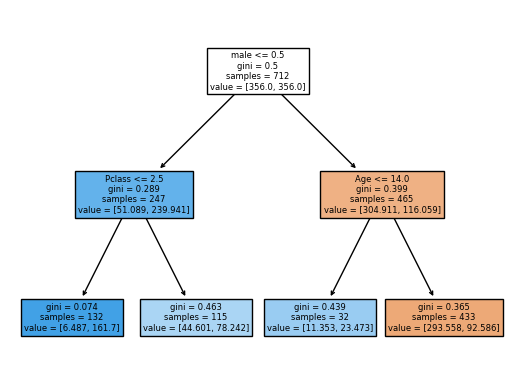

In [239]:
# code7-1
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df2 = pd.read_csv('../datafiles/Survived.csv')
# df.head(2) # 先頭2行の確認
# code7-17
# Age列の欠損値行を抜き出すのに必要（欠損だとTrue)
is_null = df2['Age'].isnull()
 
# Pclass 1　に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 35
 
# Pclass 2　に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 25
 
# Pclass 3　に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 20
 
# code7-21
# 特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare','Sex']
x = df2[col]
t = df2['Survived']
 
# code7-22
male = pd.get_dummies(df2['Sex'],drop_first = True)
 
# code7-26
x_tmp=pd.concat([x,male],axis=1)
 
# code7-28
x_new = x_tmp.drop("Sex",axis=1)
 
depth=5
x_train,x_test,y_train,y_test = train_test_split(x_new,
    t,test_size = 0.2,random_state = 0)
model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0,class_weight="balanced")
model.fit(x_train,y_train)
 
model.score(x_test, y_test)

from sklearn.tree import plot_tree
depth=2
model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0,class_weight="balanced")
# model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0)
model.fit(x_train,y_train)
 
plot_tree(model, feature_names = list(x_train.columns),filled = True)


In [25]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

#DTree クラス
class DTree():
    def __init__(self,file_path):
        self.df=pd.read_csv(file_path)
    def shape(self):
        return self.df.shape
    def isnull_sum(self):
        return self.df.isnull().sum()
    def fillna_mean(self,columns): #平均値での穴埋め
        for c in columns:
            self.df[c]=self.df[c].fillna(self.df[c].mean())
    def fillna_mode0(self,columns): #最頻値での穴埋め
        for c in columns:
            self.df[c]=self.df[c].fillna(self.df[c].mode()[0])

    def setX(self,columns):
        self.x=self.df[columns]
    def getX(self):
        return self.x
    def setY(self,columns):
        self.y=self.df[columns]
    def getY(self):
        return self.y
    
    def split(self,test_size,random_state):
        self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(
            self.x,self.y,test_size=test_size,random_state=random_state)
    def getX_train(self) -> pd.DataFrame:
        return self.x_train
    def getX_test(self):
        return self.x_test
    def getY_train(self):
        return self.y_train
    def getY_test(self):
        return self.y_test
    
    def set_model(self,max_depth,random_state=0,class_weight="balanced"):
        self.model = tree.DecisionTreeClassifier(
            max_depth = 5,random_state = 0,class_weight ='balanced')
        
    def fit(self):
        self.model.fit(self.x_train,self.y_train)
    
    def score(self):
        return self.model.score(X = self.x_test,y = self.y_test)
    
    def get_df(self):
        return self.df
    def get_model(self):
        return self.model
    def concat(self, df, axis=0):
        pd.concat([self.df,df],axis=axis)



#csv読込
df = DTree('../datafiles/Survived.csv')

#欠損値の確認
df.isnull_sum()
df.shape()

#欠損値の穴埋め
# df.fillna_mean(["Age"])
# df.fillna_mode0(["Embarked"])
# df.isnull_sum()

#欠損値の穴埋め2
# Age列の欠損値行を抜き出すのに必要（欠損だとTrue)
df2=df.get_df()
is_null = df2['Age'].isnull()
# Pclass 1　に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 35
# Pclass 2　に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 25
# Pclass 3　に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 20
# print(df.isnull_sum())

#穴埋め3
male = pd.get_dummies(df2['Sex'],drop_first = True)
df.concat(male,1)
# x_tmp=pd.concat([df2,male],axis=1)
# x_new = x_tmp.drop("Sex",axis=1)

#debug
# print(df.isnull_sum())
# print(df.get_df()["Sex"])
print(df.get_df()["male"])


#特徴量と正解データの分割
# df.setX(['Pclass','Age','SibSp','Parch','Fare'])
# df.setX(['Pclass','Age','SibSp','Parch','Fare','Sex'])
df.setX(['Pclass','Age','SibSp','Parch','Fare','male'])
df.setY(['Survived',])
df.getX().shape, df.getY().shape
df.split(0.2,0)
df.getX_train().shape
df.getX_train().head(5)

# #穴埋め3
# df3=df.get_df()
# # code7-22
# male = pd.get_dummies(df3['Sex'],drop_first = True)
# # code7-26
# x_tmp=pd.concat([df.getX(),male],axis=1)
# # code7-28
# x_new = x_tmp.drop("Sex",axis=1)

# df.setX(x_new.columns)

#モデル作成、学習
df.set_model(5)
df.fit()
df.score()



# list(df.getX_train().columns)


KeyError: 'male'

[Text(0.4895833333333333, 0.9166666666666666, 'Pclass <= 2.5\ngini = 0.5\nsamples = 712\nvalue = [356.0, 356.0]'),
 Text(0.19791666666666666, 0.75, 'Fare <= 13.646\ngini = 0.448\nsamples = 316\nvalue = [115.964, 225.597]'),
 Text(0.0625, 0.5833333333333334, 'Fare <= 7.75\ngini = 0.486\nsamples = 75\nvalue = [42.169, 29.993]'),
 Text(0.041666666666666664, 0.4166666666666667, 'gini = 0.0\nsamples = 9\nvalue = [7.298, 0.0]'),
 Text(0.08333333333333333, 0.4166666666666667, 'Age <= 51.0\ngini = 0.497\nsamples = 66\nvalue = [34.87, 29.993]'),
 Text(0.041666666666666664, 0.25, 'Age <= 27.5\ngini = 0.5\nsamples = 59\nvalue = [29.194, 29.993]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.462\nsamples = 23\nvalue = [13.786, 7.824]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.484\nsamples = 36\nvalue = [15.408, 22.168]'),
 Text(0.125, 0.25, 'Fare <= 11.425\ngini = 0.0\nsamples = 7\nvalue = [5.677, 0.0]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 3\

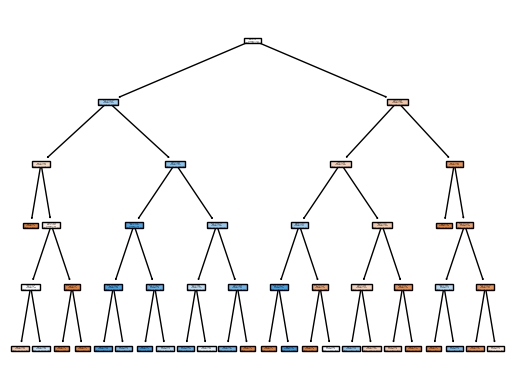

In [ ]:
from sklearn.tree import plot_tree
%matplotlib inline

depth=2

df.set_model(depth)
df.fit()

df.getX_train()
plot_tree(df.get_model(), feature_names = list(df.getX_train().columns),filled = True)
